<a href="https://colab.research.google.com/github/saha1972/cours_mallat_cdf/blob/main/WienerFilter_transitoires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from  scipy import signal

In [2]:
rng = np.random.default_rng(42)
'''
This line of code initializes a new pseudo-random number generator using NumPy's default_rng() function.
The number 42 is used as a 'seed'. This means that every time you run this code with the same seed,
the sequence of random numbers generated will be identical, ensuring reproducibility in your results.
'''

"\nThis line of code initializes a new pseudo-random number generator using NumPy's default_rng() function.\nThe number 42 is used as a 'seed'. This means that every time you run this code with the same seed,\nthe sequence of random numbers generated will be identical, ensuring reproducibility in your results.\n"

In [3]:

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 16

In [4]:
def h0(x):
  return 10*np.sin(4*np.pi*x+0.8*np.pi)
def h1(x):
  return 5*(2*x)**3-100
def f0(x):
 return np.piecewise(x,
                     [x<=0.2,
                      (0.2<x) & (x<=0.4),
                     (0.4<x) & (x<=1.1),
                     (1.1<x) & (x<=1.4),
                      (1.4<x) & (x<= 1.5),
                      (1.5<x) & (x<=1.8),
                     x>=1.8],
                     [0.,
                      -30.,
                      lambda x:h0(x),
                      lambda x:h1(x),
                      lambda x:h1(x)+30,
                      lambda x:h1(x)-30,
                      0.
                     ])


def f(x):
  return -f0(2*x)/10.

In [5]:
Ns = 2**10
print(Ns)

1024


In [6]:
time =np.arange(0., 1.0, 1./Ns)
y = f(time)

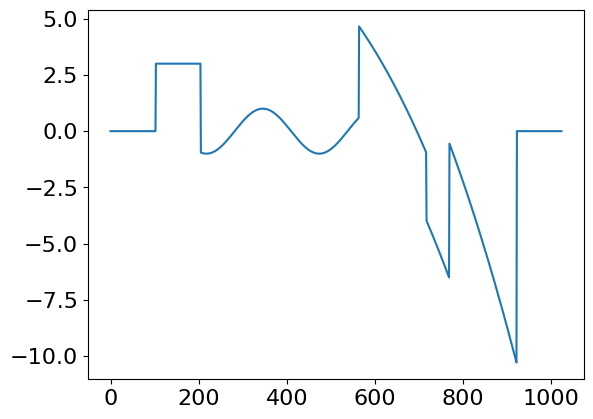

In [ ]:
plt.plot(y)

In [7]:
noise_power = 0.01 * Ns / 2
sigma_corrupt = 0.2*np.sqrt(noise_power)
noise = rng.normal(scale=sigma_corrupt, size=time.shape)   # noise corruption

In [8]:
y_noisy = y+ noise  # noisy signal

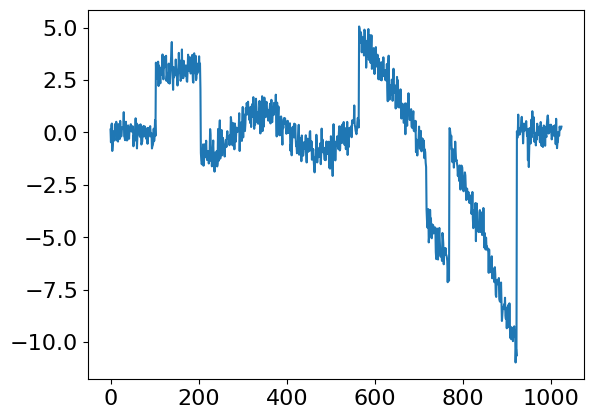

In [ ]:
plt.plot(y_noisy)

In [9]:
freqs, Pyy = signal.csd(y, y, nperseg=Ns)               # power spectrum of the gaussian
freqs, Pnn = signal.csd(noise, noise, nperseg=Ns)       # power spectrum of the noise

In [34]:
print(max(Pyy))
print(max(Pnn))
print(Pyy.shape)
print(Pnn.shape)

1027.7900094801523
2.500939241274617
(513,)
(513,)


In [11]:
N=1024
np.arange(N)/N

array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.97070312e-01, 9.98046875e-01, 9.99023438e-01])

In [30]:
Wh = Pyy/(Pyy+Pnn)
print(Wh.shape)

(513,)


In [31]:
hat_noisy = np.fft.rfft(y_noisy)
print(hat_noisy.shape)

(513,)


In [19]:
y_filtered_perfect= np.fft.irfft(hat_noisy * Wh)

In [20]:
a = np.mean(y**2)
b= np.mean((y-y_noisy)**2)
snr_before = 10*np.log10(a/b) # PSNR before filtering
c = np.mean((y-y_filtered_perfect)**2)
snr_after =10*np.log10(a/c)  # PSNR after filtering
'''
The code calculates the Signal-to-Noise Ratio (SNR) before and after filtering using the following steps:

a = np.mean(y**2): This calculates the mean squared value of the original, true signal y. This represents the signal power.
b = np.mean((y-y_noisy)**2): This calculates the mean squared error between the original signal y and the noisy signal y_noisy. This represents the noise power in the unfiltered signal.
snr_before = 10*np.log10(a/b): This computes the SNR before filtering in decibels (dB). It's calculated as 10 * log10(signal_power / noise_power).
c = np.mean((y-y_filtered_perfect)**2): This calculates the mean squared error between the original signal y and the perfectly filtered signal y_filtered_perfect. This represents the remaining noise power after filtering.
snr_after =10*np.log10(a/c): This computes the SNR after filtering in decibels (dB), using the same formula but with the post-filtering noise power.
'''

"\nThe code calculates the Signal-to-Noise Ratio (SNR) before and after filtering using the following steps:\n\na = np.mean(y**2): This calculates the mean squared value of the original, true signal y. This represents the signal power.\nb = np.mean((y-y_noisy)**2): This calculates the mean squared error between the original signal y and the noisy signal y_noisy. This represents the noise power in the unfiltered signal.\nsnr_before = 10*np.log10(a/b): This computes the SNR before filtering in decibels (dB). It's calculated as 10 * log10(signal_power / noise_power).\nc = np.mean((y-y_filtered_perfect)**2): This calculates the mean squared error between the original signal y and the perfectly filtered signal y_filtered_perfect. This represents the remaining noise power after filtering.\nsnr_after =10*np.log10(a/c): This computes the SNR after filtering in decibels (dB), using the same formula but with the post-filtering noise power.\n"

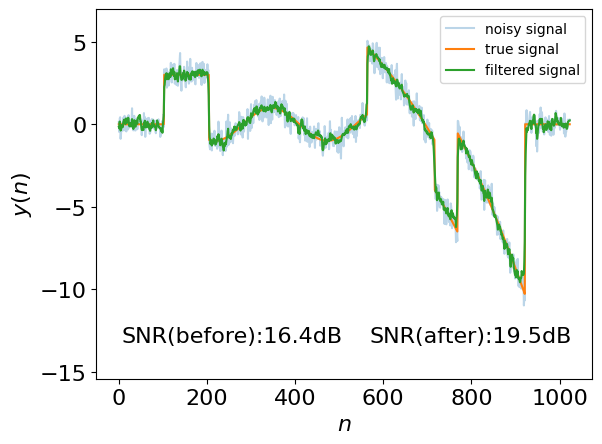

In [21]:
plt.plot(y_noisy,alpha=0.3, label="noisy signal")
plt.plot(y,label="true signal")
plt.plot(y_filtered_perfect,label="filtered signal")
plt.xlabel(r"$n$")
plt.ylabel(r"$y(n)$");
ax = plt.gca()
plt.text(0.05,0.1,f"SNR(before):{snr_before:.1f}dB",backgroundcolor="white", transform=ax.transAxes)
plt.text(0.55,0.1,f"SNR(after):{snr_after:.1f}dB",backgroundcolor="white",transform=ax.transAxes)
plt.ylim([y.min()*1.5,y.max()*1.5])
plt.legend(fontsize=10,loc='upper right');

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from scipy.io import wavfile
#from os import chdir

# The ! cd command only changes directory for that specific shell command.
# For Python to find the file, provide the full path.
samplRate, data = wavfile.read("/content/drive/MyDrive/mySqueal.WAV")

/tmp/ipython-input-1279683760.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplRate, data = wavfile.read("/content/drive/MyDrive/mySqueal.WAV")


In [ ]:
new_samplRate = 44100
data_downsampled = signal.resample_poly(data, new_samplRate, samplRate)

print(f"Original sample rate: {samplRate} Hz")
print(f"Downsampled sample rate: {new_samplRate} Hz")
print(f"Original data shape: {data.shape}")
print(f"Downsampled data shape: {data_downsampled.shape}")

Original sample rate: 51200 Hz
Downsampled sample rate: 44100 Hz
Original data shape: (766327,)
Downsampled data shape: (660059,)


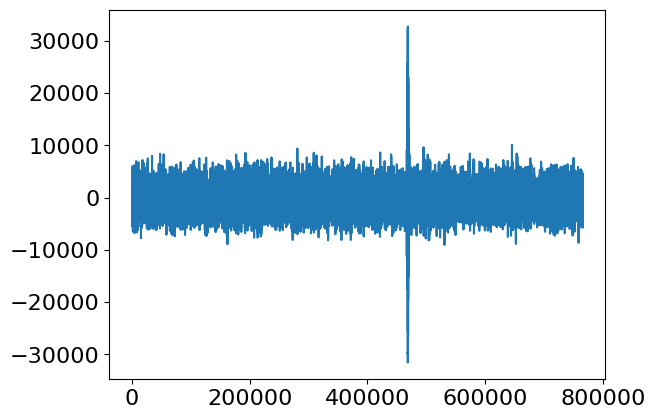

In [24]:
y_orig = data
#y_orig, y_down = data, data_downsampled
plt.plot(y_orig,label="original signal")
#plt.plot(y_down,label="downsampled signal")


In [25]:
freqs, Syy = signal.csd(y_orig, y_orig, nperseg=51200/4)      # power spectrum of the signal
#freqs, Pnn = signal.csd(noise, noise, nperseg=Ns)       # power spectrum of the noise
'''
This code calculates the Cross-Spectral Density (CSD) of the y_orig signal with itself, which is equivalent to its Power Spectral Density (PSD). It uses the scipy.signal.csd function. The arguments are:

y_orig: The input signal for both x and y parameters, indicating that the power spectral density of y_orig is being computed.
nperseg: The number of samples per segment for the FFT. Here, it's set to 51200 / 4, which is 12800 samples. This parameter influences the frequency resolution and statistical properties of the resulting spectrum.
The result, Syy, represents the power spectral density of the y_orig signal. The commented-out line shows how the CSD of noise could be calculated if a noise signal were available.
'''

"\nThis code calculates the Cross-Spectral Density (CSD) of the y_orig signal with itself, which is equivalent to its Power Spectral Density (PSD). It uses the scipy.signal.csd function. The arguments are:\n\ny_orig: The input signal for both x and y parameters, indicating that the power spectral density of y_orig is being computed.\nnperseg: The number of samples per segment for the FFT. Here, it's set to 51200 / 4, which is 12800 samples. This parameter influences the frequency resolution and statistical properties of the resulting spectrum.\nThe result, Syy, represents the power spectral density of the y_orig signal. The commented-out line shows how the CSD of noise could be calculated if a noise signal were available.\n"

In [26]:
L = len(y_orig[:-1])
print (L)

766326


In [35]:
mySqueal_noisy = np.fft.rfft(y_orig, n=12800)
'''
This line of code calculates the Real Fast Fourier Transform (RFFT) of the y_orig signal. The RFFT is an optimized version of the Fast Fourier Transform (FFT) for real-valued input signals.
Since the input y_orig (the original audio data) is real, np.fft.rfft() is more efficient than np.fft.fft().
The result, which represents the frequency components of the signal, is stored in the variable mySqueal_noisy.
'''

'\nThis line of code calculates the Real Fast Fourier Transform (RFFT) of the y_orig signal. The RFFT is an optimized version of the Fast Fourier Transform (FFT) for real-valued input signals. \nSince the input y_orig (the original audio data) is real, np.fft.rfft() is more efficient than np.fft.fft(). \nThe result, which represents the frequency components of the signal, is stored in the variable mySqueal_noisy.\n'

In [36]:
Wh_orig = Syy/(Syy+0.001*Syy) # here, signal is already noisy so no info for Pyy or Pnn in  Pyy/(Pyy+Pnn)
print(Wh_orig.shape)
print(mySqueal_noisy.shape)

(6401,)
(6401,)


In [37]:
mySqueal_filtered_perfect= np.fft.irfft(mySqueal_noisy * Wh_orig)

In [42]:
a = np.mean(y_orig**2)
#b= np.mean((y-y_noisy)**2)
#snr_before = 10*np.log10(a/b) # PSNR before filtering
c = np.mean((y_orig[0:12800]-mySqueal_filtered_perfect)**2)
snr_after =10*np.log10(a/c)  # PSNR after filtering

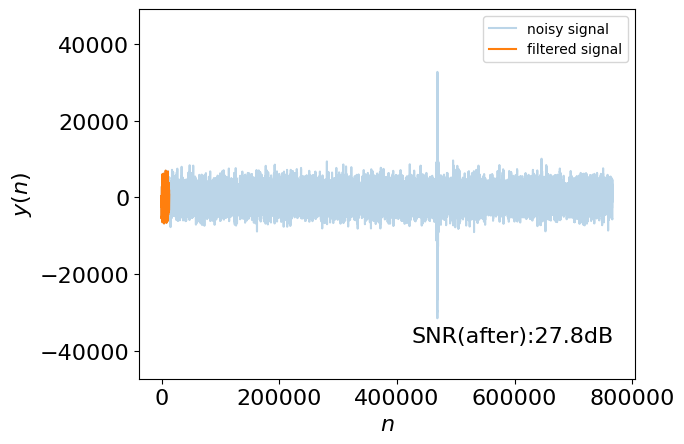

In [43]:
plt.plot(y_orig[:-1],alpha=0.3, label="noisy signal")
#plt.plot(y,label="true signal")
plt.plot(mySqueal_filtered_perfect,label="filtered signal")
plt.xlabel(r"$n$")
plt.ylabel(r"$y(n)$");
ax = plt.gca()
#plt.text(0.05,0.1,f"SNR(before):{snr_before:.1f}dB",backgroundcolor="white", transform=ax.transAxes)
plt.text(0.55,0.1,f"SNR(after):{snr_after:.1f}dB",backgroundcolor="white",transform=ax.transAxes)
plt.ylim([y_orig.min()*1.5,y_orig.max()*1.5])
plt.legend(fontsize=10,loc='upper right');